In [2]:
pip install open3d

  Using cached open3d-0.14.1-cp39-cp39-win_amd64.whl (59.9 MB)
  Using cached jupyter_packaging-0.11.1-py2.py3-none-any.whl (14 kB)
  Using cached tomlkit-0.8.0-py3-none-any.whl (33 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
import open3d as o3d
import open3d_tutorial as o3dtut
import numpy as np
np.set_printoptions(threshold = np.inf)
import matplotlib.pyplot as plt

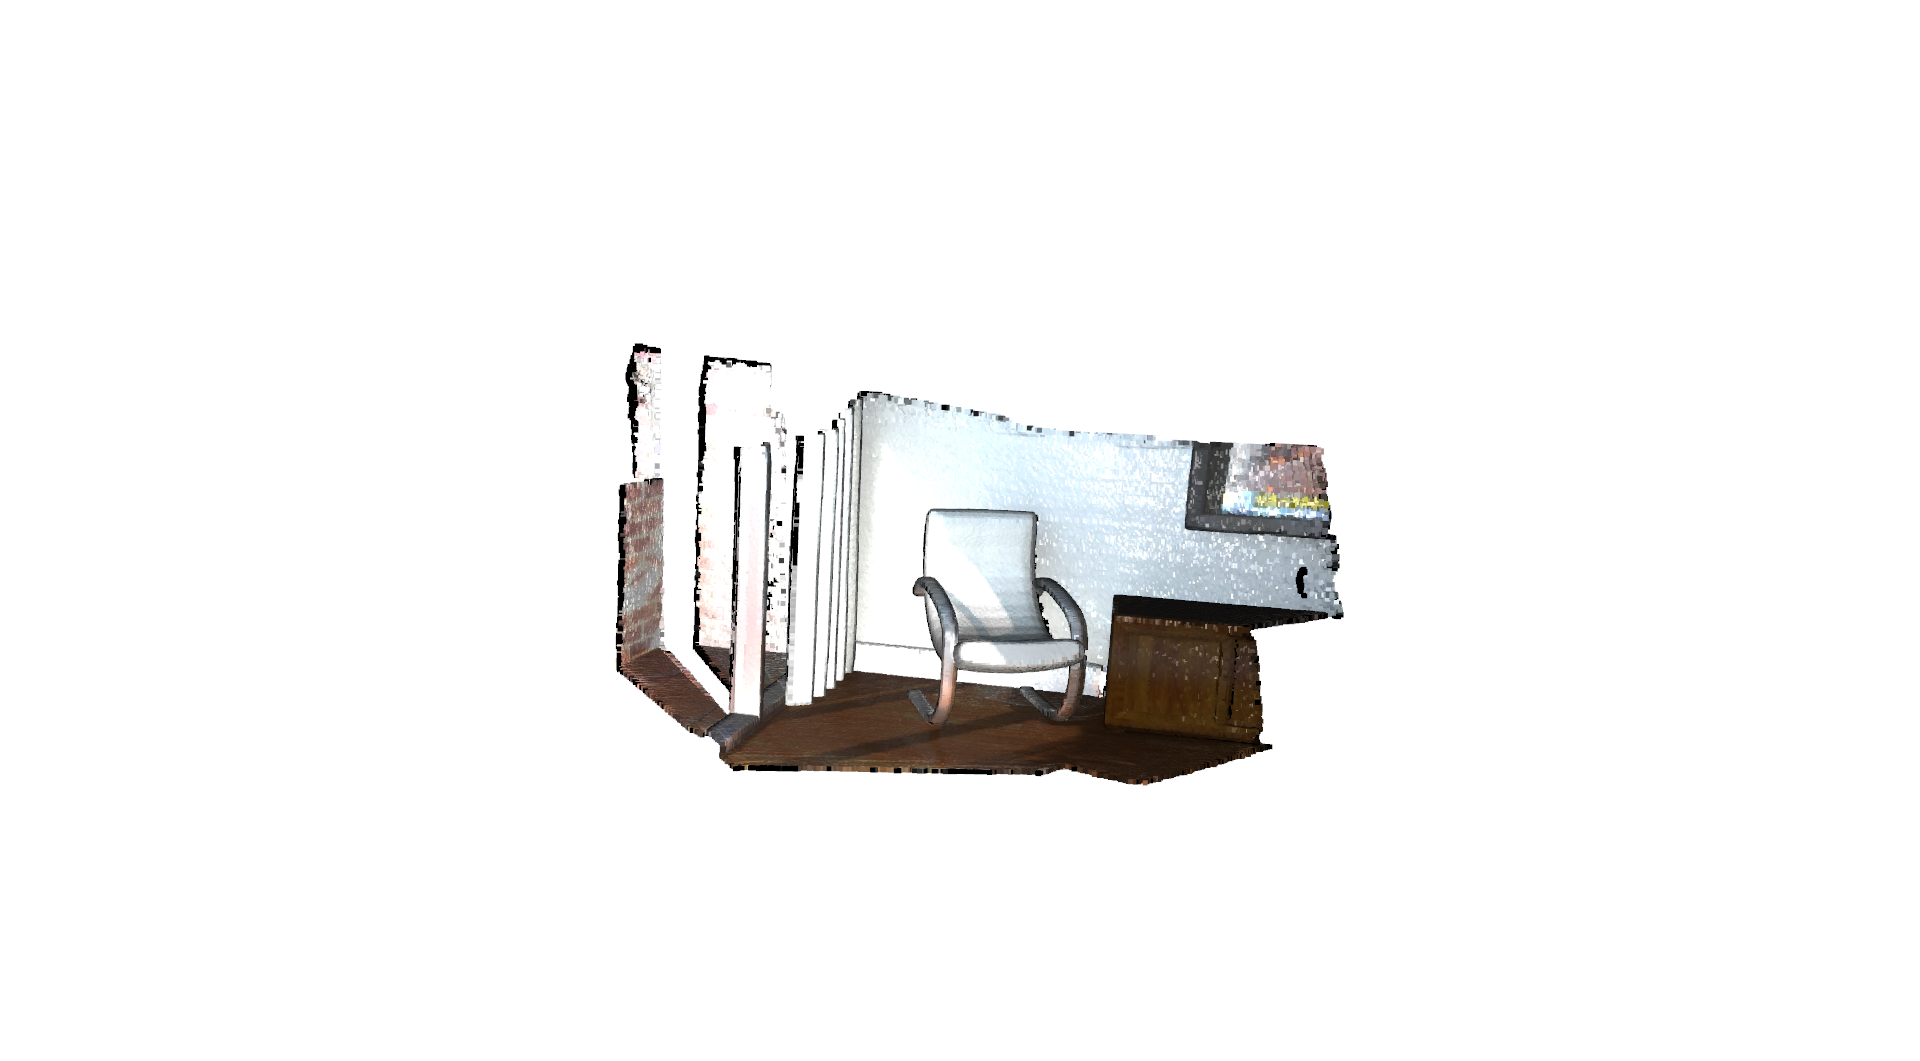

In [22]:
pcl = o3d.io.read_point_cloud("fragment.ply")
o3d.visualization.draw_geometries([pcl])

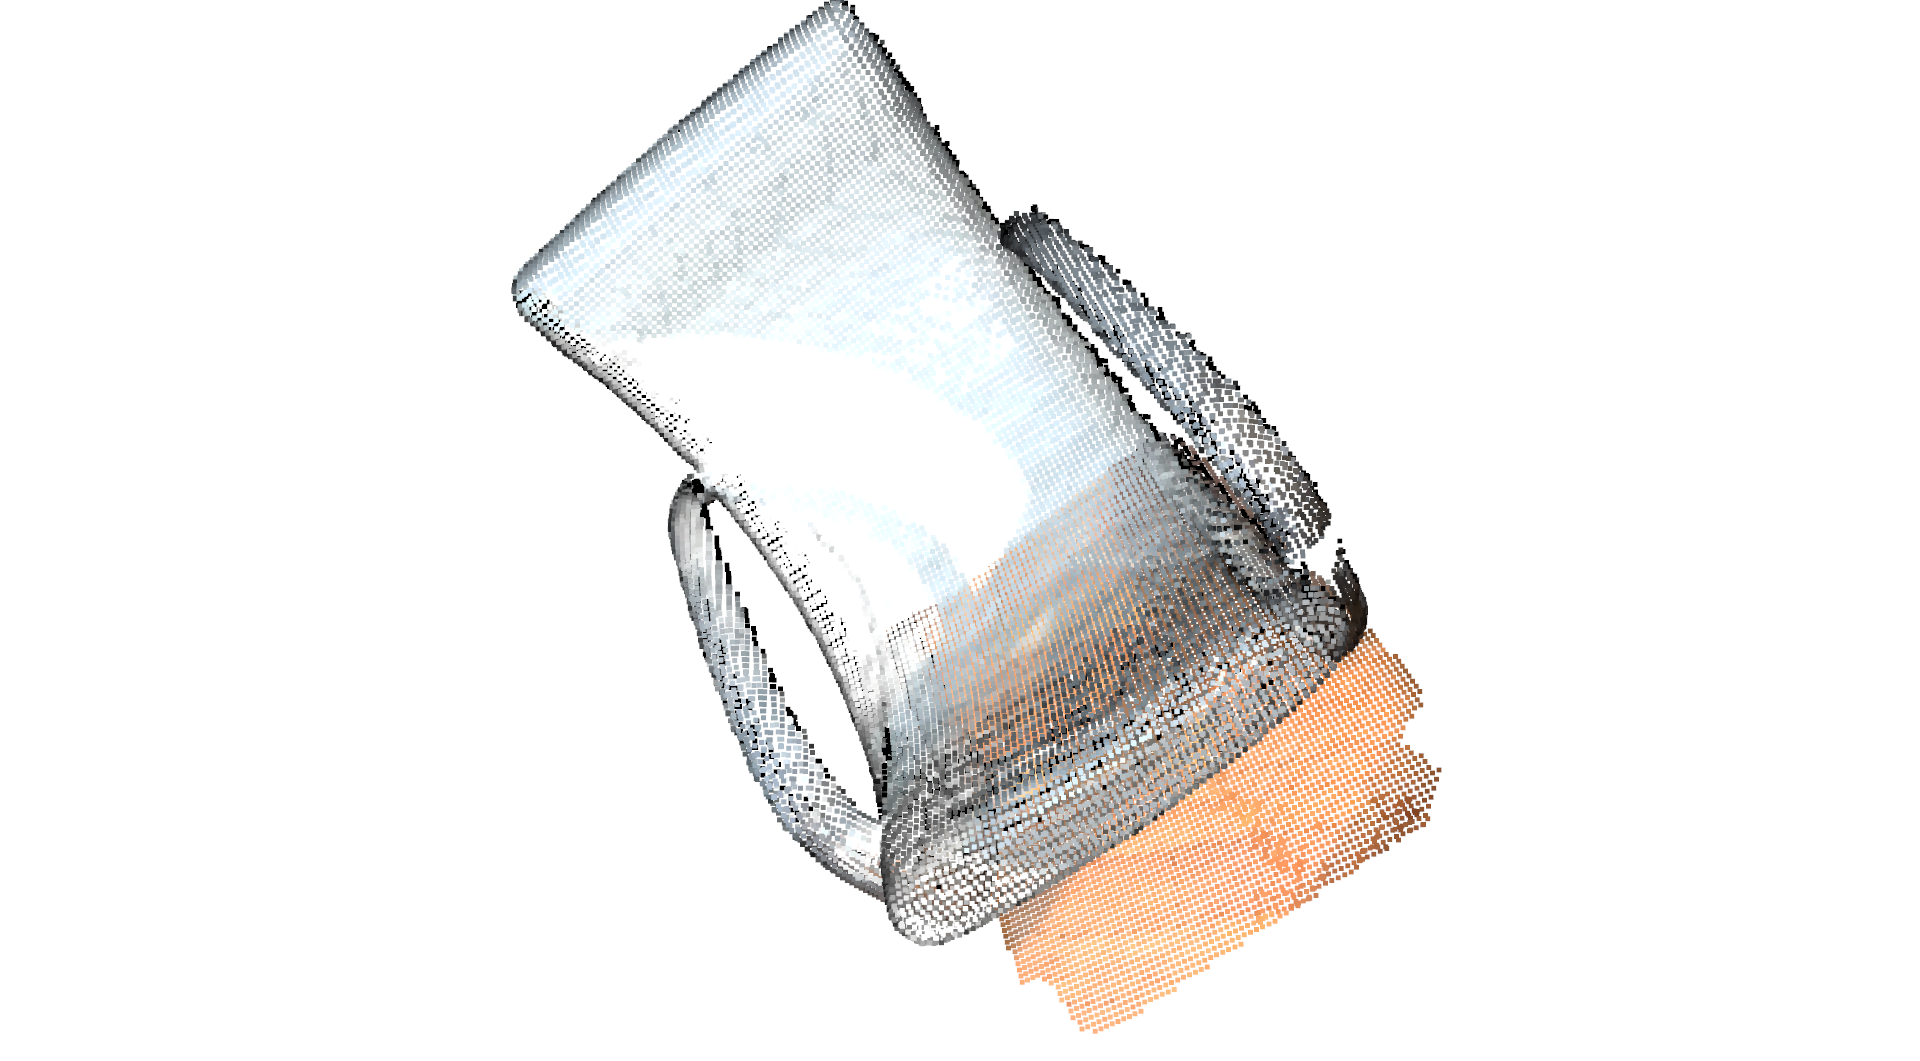

In [31]:
cropped=o3d.visualization.read_selection_polygon_volume("cropped.json")
chair = cropped.crop_point_cloud(pcl)
#down_chair = chair.voxel_down_sample(voxel_size = 0.06)
o3d.visualization.draw_geometries([chair])

In [38]:
chair_points = np.asarray(chair.points)
#print(chair_points)
chair_points.shape

(31337, 3)

In [39]:
pcl_points = np.asarray(pcl.points)
pcl_points.shape

(196133, 3)

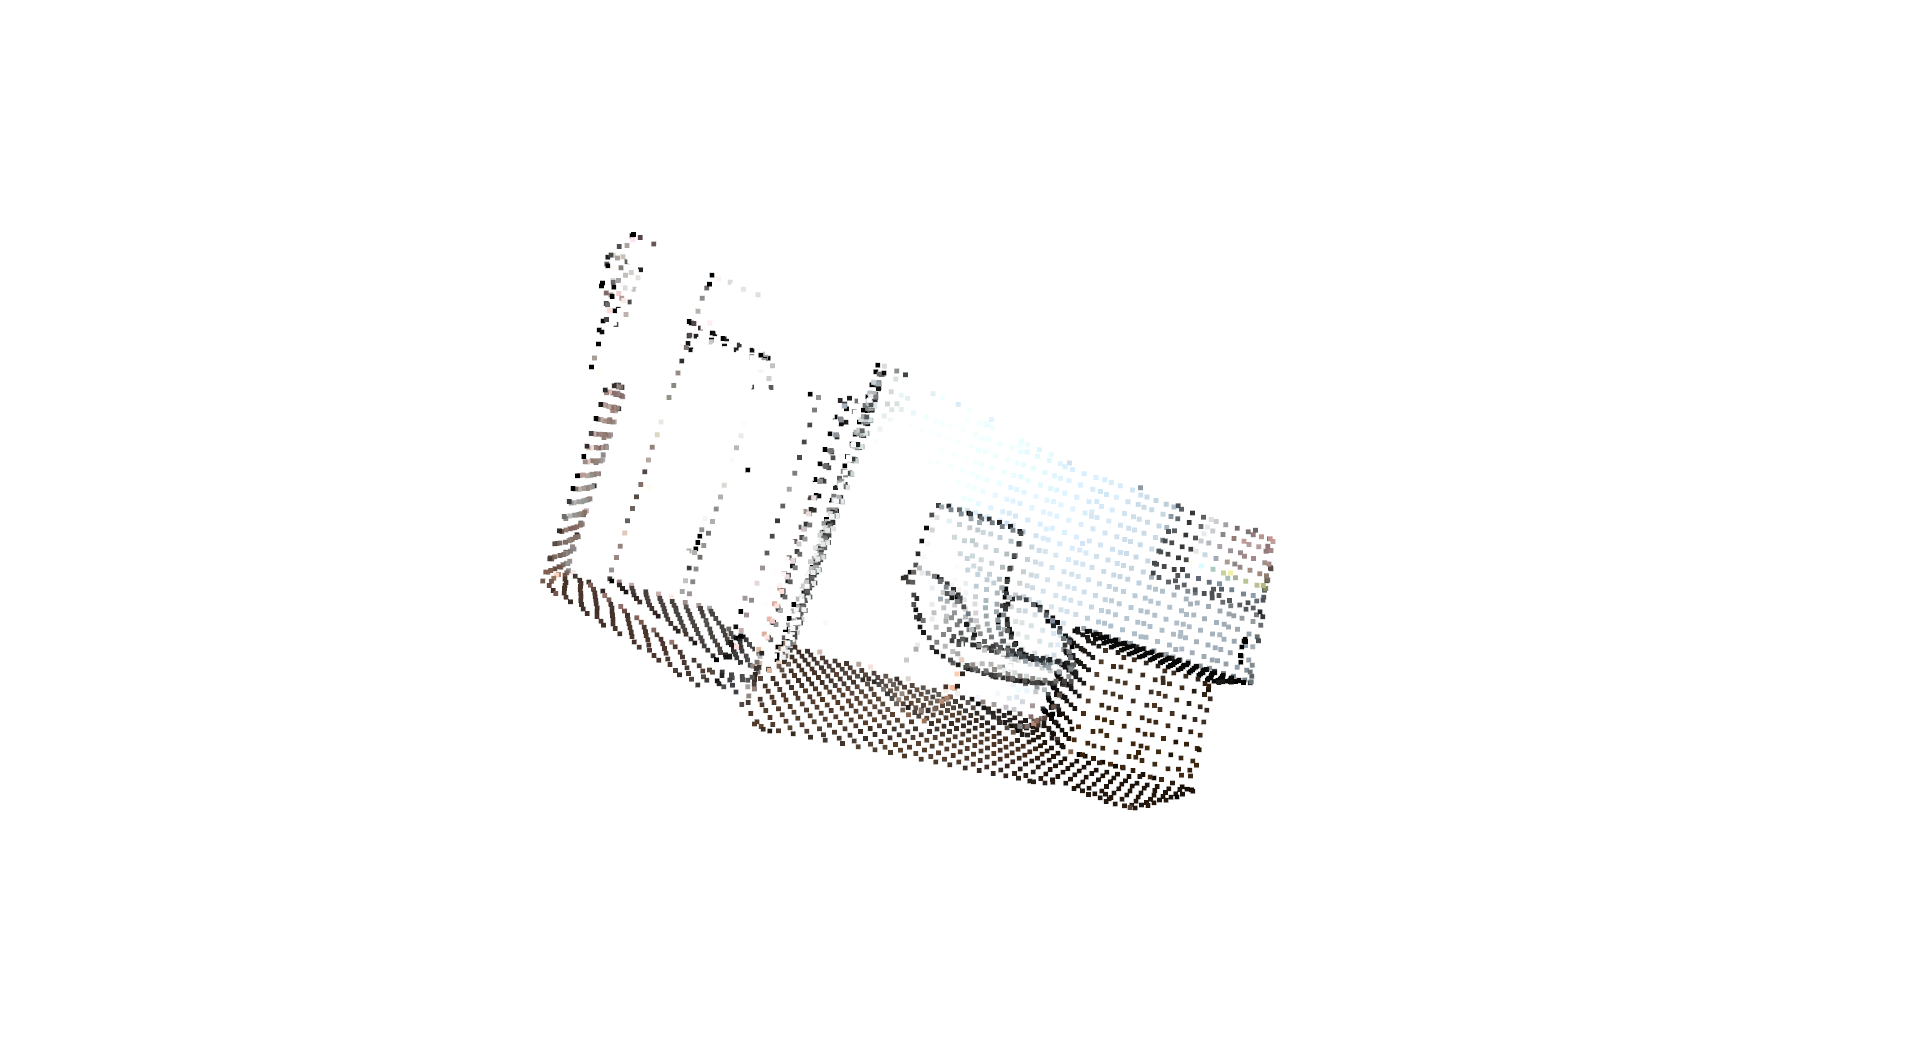

In [26]:
pcd_down = pcl.voxel_down_sample(voxel_size = 0.06)
o3d.visualization.draw_geometries([pcd_down])

In [40]:
down_arr = np.asarray(pcd_down.points)
#print(down_arr)

In [35]:
down_arr.shape

(3230, 3)

In [37]:
arr_diff = down_arr - chair_points

ValueError: operands could not be broadcast together with shapes (3230,3) (559,3) 

#### Logically, addition and subtraction cannot be performed between these 2 arrays because they are of different shape

#### Here the proposed methodology was to subtract the 2 arrays that we can generate from the above point clouds. While this can be done with 2D data, this cannot be done with 3D data because it will disturb the whole environment of the point cloud. Also Addition and subtraction can only be done with Arrays of same Size, Shape, Dimensions. So, untill and unless we have arrays of same shape,size and dimensions, we cannot subtract or add them.